In [16]:
from keras.layers import Input, Dense
from keras.models import Model


input_dim = 8
encoding_dim = 4


input_img = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_img)
decoded = Dense(input_dim, activation='relu')(encoded)


autoencoder = Model(input_img, decoded)
encoder = Model(input_img, encoded)


encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))

autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [17]:
from dataset import load_normalized_dataset
import numpy as np
from random import choice


x_train, x_test, y_train, y_test = load_normalized_dataset()

# add random positive instance in order to balance the positive and negative samples
# ones = x_train[y_train == 1]
# for _ in range(200):
#     x_train = np.append(x_train, [choice(ones)], axis=0)
#     y_train = np.append(y_train, 1)

print x_train.shape
print x_test.shape

(614, 8)
(154, 8)


In [25]:
autoencoder.fit(x_train, x_train,
                epochs=250,
                batch_size=32,
                shuffle=True,
                validation_data=(x_test, x_test),
                verbose=0)

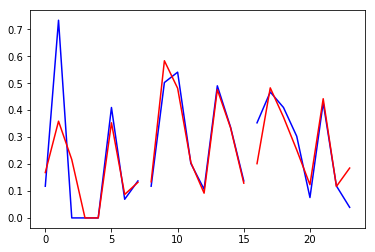

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
from random import randint

encoded_imgs = encoder.predict(x_train)
decoded_imgs = decoder.predict(encoded_imgs)


l = 8
for i in range(3):
    idx = randint(0, x_train.shape[0])
    plt.plot(range(i*l, (i+1)*l), x_train[idx], 'b')
    plt.plot(range(i*l, (i+1)*l), decoded_imgs[idx], 'r')
plt.show()